In [84]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')
from graph_farms.generate_graphs import generate_graphs
from gnn_framework.data import GraphFarmsDataset
from plotting import plot_vs_x
from torch_geometric.loader import DataLoader
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [101]:
# generate some data for a single wind farm layout and multiple inflows for both load models with one wind speed and ti (testing directions)
generate_graphs(config_path='../graph_farms/config.yml', num_layouts=1, num_inflows=300, dset_path='./loads_model_test/', num_threads=2,
                connectivity='delaunay', loads_model='both', fixed_ti=15, fixed_ws=10)


1/1 [==============================] - 0s 270ms/step
Finished generating 300 graphs (1 layouts x 300 inflows)!


In [102]:
onewt_dataset = GraphFarmsDataset(root_path='./loads_model_test/OneWT/delaunay')
onewt_loader = DataLoader(onewt_dataset, batch_size=1, shuffle=False)
onewt_data = []
for i_batch, data in enumerate(onewt_loader):
        onewt_data += [data.y]
        
twowt_dataset = GraphFarmsDataset(root_path='./loads_model_test/TwoWT/delaunay')
twowt_loader = DataLoader(twowt_dataset, batch_size=1, shuffle=False)
twowt_data = []
for i_batch, data in enumerate(twowt_loader):
        twowt_data += [data.y]

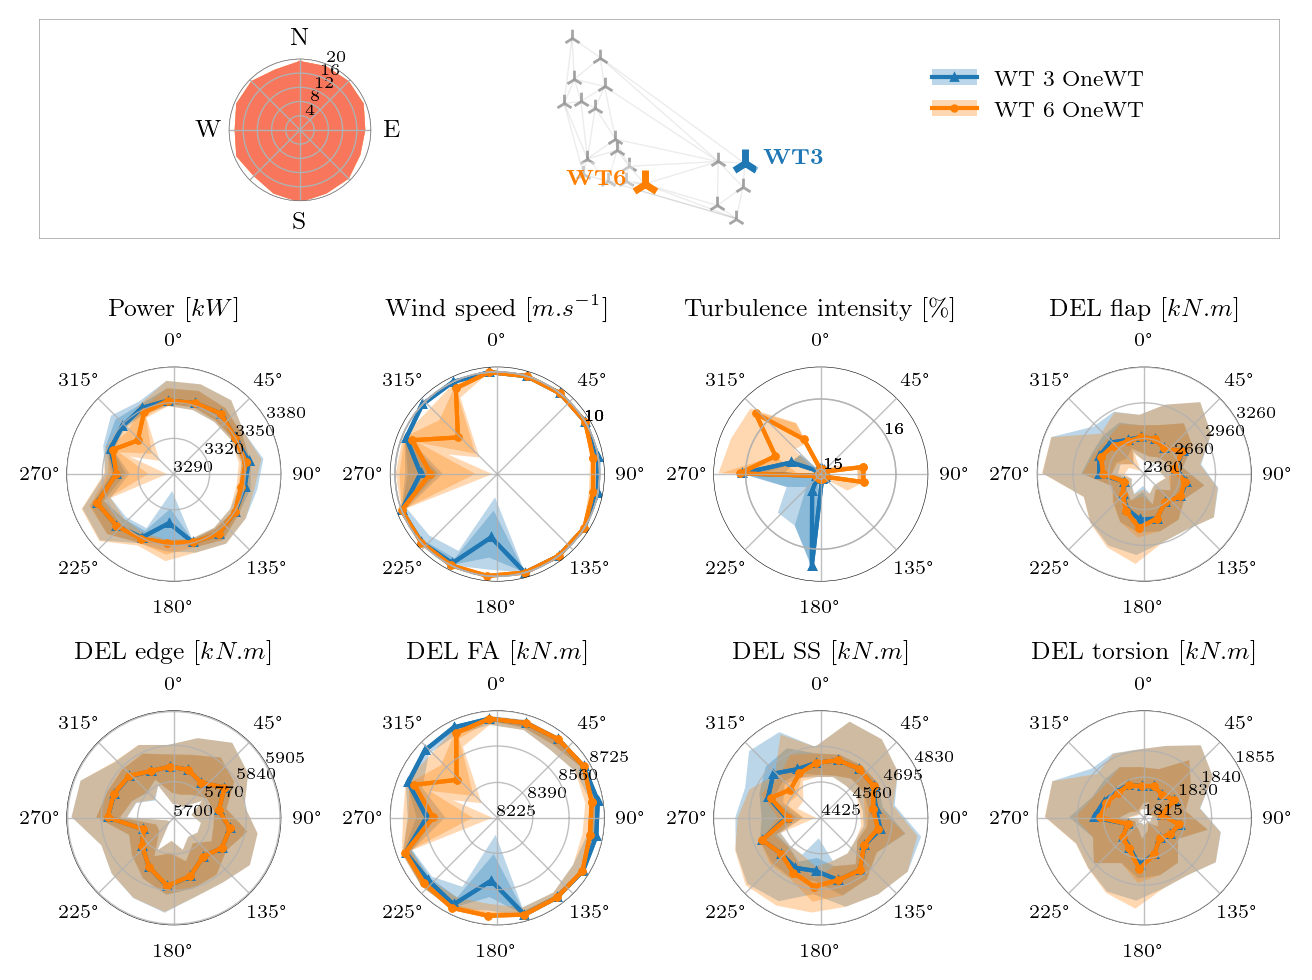

In [103]:
plot_vs_x(dataset=onewt_dataset, y=onewt_data, y_pred=None, layout_idx=0, x_axis='wd', turb=[2, 5], num_inflows_per_layout=300, dpi=200, show_farm=True,
          labels=['OneWT'])
plt.show()

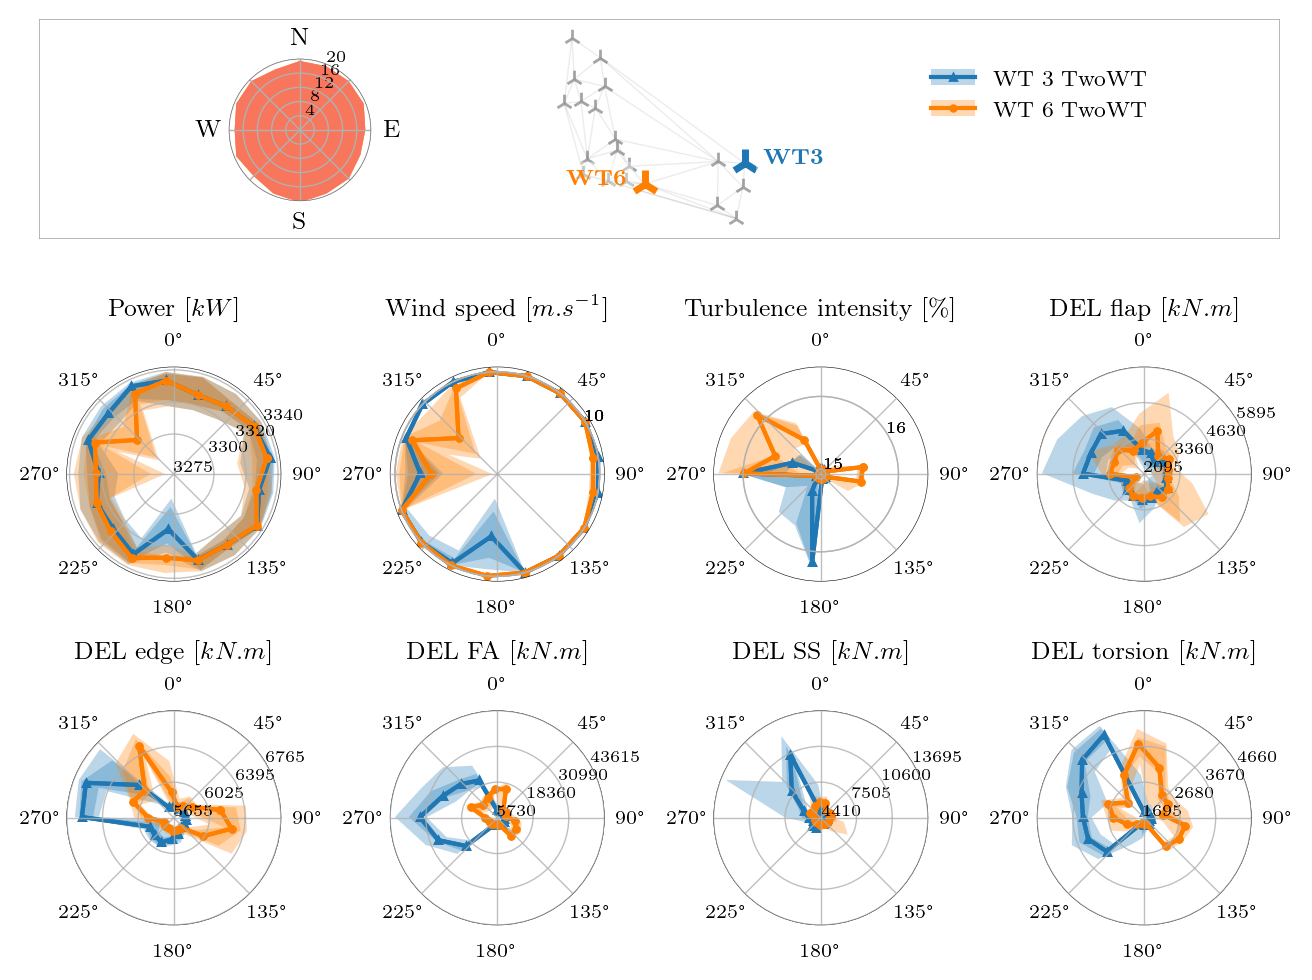

In [104]:
plot_vs_x(dataset=onewt_dataset, y=twowt_data, y_pred=None, layout_idx=0, x_axis='wd', turb=[2, 5], num_inflows_per_layout=300, dpi=200, show_farm=True,
          labels=['TwoWT'])
plt.show()

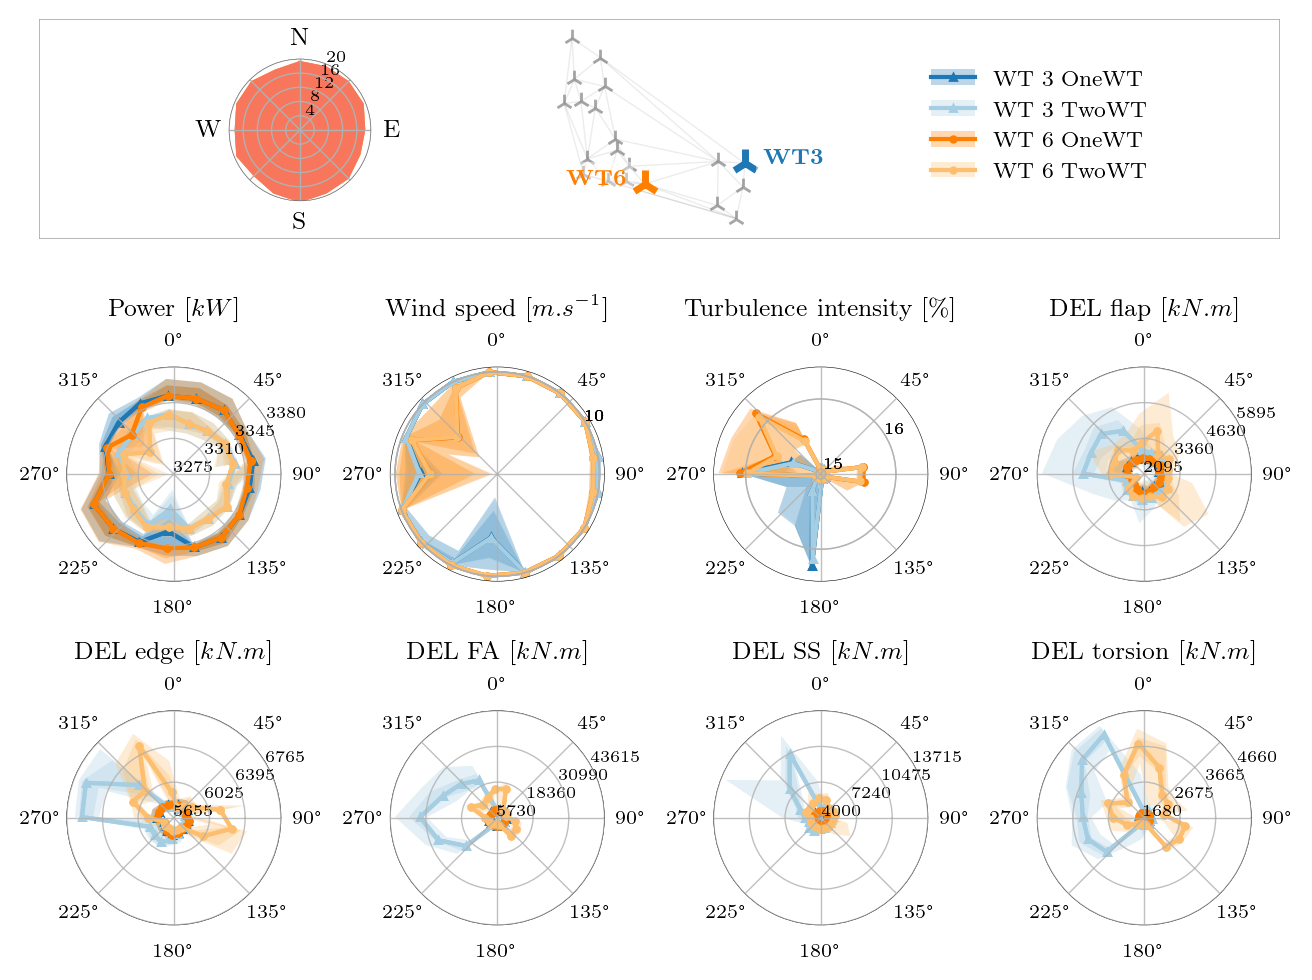

In [105]:
plot_vs_x(dataset=onewt_dataset, y=onewt_data, y_pred=twowt_data, layout_idx=0, x_axis='wd', turb=[2, 5], num_inflows_per_layout=300, dpi=200, show_farm=True,
          labels=['OneWT', 'TwoWT'])
plt.show()